In [1]:
# Import necessary libraries for data manipulation, machine learning, and interface building
import pandas as pd
import plotly.express as px
import nbformat
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
import gradio as gr

# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

c:\Users\Varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/raw.csv')

In [3]:
df.head(15)

,ID,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,...,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION
0,117135,Male,Disloyal,56,Personal,Eco,369,0,2,0,...,3,1,5,3,3,4,3,0,0.0,Satisfied
1,72091,Male,Disloyal,49,Personal,Eco,2486,0,2,1,...,2,1,1,4,4,3,2,0,0.0,Satisfied
2,29663,Male,Disloyal,55,Personal,Eco,1448,0,3,0,...,3,3,5,3,2,3,3,0,0.0,Satisfied
3,81849,Female,Disloyal,36,Personal,Eco,1501,0,4,0,...,4,5,4,5,5,5,4,0,0.0,Satisfied
4,83693,Male,Disloyal,55,Personal,Eco,577,0,5,0,...,3,3,4,5,3,4,3,0,0.0,Satisfied
5,129488,Female,Disloyal,15,Personal,Eco,2704,1,0,1,...,1,5,3,5,5,5,1,0,0.0,Neutral or Dissatisfied
6,69507,Male,Disloyal,51,Personal,Eco,1746,1,0,1,...,1,5,3,5,4,4,1,20,22.0,Neutral or Dissatisfied
7,126309,Female,Disloyal,26,Personal,Eco,650,1,1,1,...,2,2,5,2,1,3,2,0,0.0,Neutral or Dissatisfied
8,123581,Female,Disloyal,37,Personal,Eco,1773,1,1,1,...,2,2,5,3,3,3,2,5,4.0,Neutral or Dissatisfied
9,24129,Female,Disloyal,65,Personal,Eco,584,1,1,1,...,4,3,4,4,4,3,4,0,13.0,Neutral or Dissatisfied


In [4]:
df.columns

Index(['ID', 'GENDER', 'CUSTOMER_TYPE', 'AGE', 'TYPE_OF_TRAVEL', 'CLASS',
       'FLIGHT_DISTANCE', 'INFLIGHT_WIFI_SERVICE',
       'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 'EASE_OF_ONLINE_BOOKING',
       'GATE_LOCATION', 'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT',
       'INFLIGHT_ENTERTAINMENT', 'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE',
       'BAGGAGE_HANDLING', 'CHECKIN_SERVICE', 'INFLIGHT_SERVICE',
       'CLEANLINESS', 'DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES',
       'SATISFACTION'],
      dtype='object')

In [5]:
unique_counts = df.nunique()
unique_counts

ID                                   129880
GENDER                                    2
CUSTOMER_TYPE                             2
AGE                                      75
TYPE_OF_TRAVEL                            2
CLASS                                     3
FLIGHT_DISTANCE                        3821
INFLIGHT_WIFI_SERVICE                     6
DEPARTURE/ARRIVAL_TIME_CONVENIENT         6
EASE_OF_ONLINE_BOOKING                    6
GATE_LOCATION                             6
FOOD_AND_DRINK                            6
ONLINE_BOARDING                           6
SEAT_COMFORT                              6
INFLIGHT_ENTERTAINMENT                    6
ON-BOARD_SERVICE                          6
LEG_ROOM_SERVICE                          6
BAGGAGE_HANDLING                          5
CHECKIN_SERVICE                           6
INFLIGHT_SERVICE                          6
CLEANLINESS                               6
DEPARTURE_DELAY_IN_MINUTES              466
ARRIVAL_DELAY_IN_MINUTES        

In [6]:
# Define the columns to adjust
columns_to_adjust = [
    'INFLIGHT_WIFI_SERVICE',
    'DEPARTURE/ARRIVAL_TIME_CONVENIENT',
    'EASE_OF_ONLINE_BOOKING',
    'GATE_LOCATION',
    'FOOD_AND_DRINK',
    'ONLINE_BOARDING',
    'SEAT_COMFORT',
    'INFLIGHT_ENTERTAINMENT',
    'ON-BOARD_SERVICE',
    'LEG_ROOM_SERVICE',
    'BAGGAGE_HANDLING',
    'CHECKIN_SERVICE',
    'INFLIGHT_SERVICE',
    'CLEANLINESS'
]

# Replace 0 with 'Not Applicable' for the specified columns
df[columns_to_adjust] = df[columns_to_adjust].replace(0, 'Not Applicable')

In [7]:
df.dtypes

ID                                     int64
GENDER                                object
CUSTOMER_TYPE                         object
AGE                                    int64
TYPE_OF_TRAVEL                        object
CLASS                                 object
FLIGHT_DISTANCE                        int64
INFLIGHT_WIFI_SERVICE                 object
DEPARTURE/ARRIVAL_TIME_CONVENIENT     object
EASE_OF_ONLINE_BOOKING                object
GATE_LOCATION                         object
FOOD_AND_DRINK                        object
ONLINE_BOARDING                       object
SEAT_COMFORT                          object
INFLIGHT_ENTERTAINMENT                object
ON-BOARD_SERVICE                      object
LEG_ROOM_SERVICE                      object
BAGGAGE_HANDLING                       int64
CHECKIN_SERVICE                       object
INFLIGHT_SERVICE                      object
CLEANLINESS                           object
DEPARTURE_DELAY_IN_MINUTES             int64
ARRIVAL_DE

In [8]:
# Convert specified columns
df['BAGGAGE_HANDLING'] = df['BAGGAGE_HANDLING'].astype('category')
df['ARRIVAL_DELAY_IN_MINUTES'] = df['ARRIVAL_DELAY_IN_MINUTES'].fillna(0).astype('int64')

# Convert remaining object columns to category
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

# Convert other non-category columns to int64
non_category_columns = df.select_dtypes(exclude=['category']).columns
df[non_category_columns] = df[non_category_columns].astype('int64', errors='ignore')

# Check the updated DataFrame dtypes
print(df.dtypes)

ID                                      int64
GENDER                               category
CUSTOMER_TYPE                        category
AGE                                     int64
TYPE_OF_TRAVEL                       category
CLASS                                category
FLIGHT_DISTANCE                         int64
INFLIGHT_WIFI_SERVICE                category
DEPARTURE/ARRIVAL_TIME_CONVENIENT    category
EASE_OF_ONLINE_BOOKING               category
GATE_LOCATION                        category
FOOD_AND_DRINK                       category
ONLINE_BOARDING                      category
SEAT_COMFORT                         category
INFLIGHT_ENTERTAINMENT               category
ON-BOARD_SERVICE                     category
LEG_ROOM_SERVICE                     category
BAGGAGE_HANDLING                     category
CHECKIN_SERVICE                      category
INFLIGHT_SERVICE                     category
CLEANLINESS                          category
DEPARTURE_DELAY_IN_MINUTES        

In [9]:
import pandas as pd

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = df_encoded[col].cat.codes  # Convert categories to integer codes

# Now, you can convert SATISFACTION to binary if it hasn't been done already
df_encoded['SATISFACTION_BINARY'] = df_encoded['SATISFACTION'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

# 1. Check categorical columns for low unique values
insignificant_columns = []

for col in df_encoded.select_dtypes(include=['category']):
    unique_count = df[col].nunique()
    if unique_count < 3:  # Low significance if fewer than 3 unique values
        insignificant_columns.append(col)

    # Check the distribution of categories
    value_counts = df[col].value_counts(normalize=True)
    if value_counts.max() > 0.9:  # If one category dominates
        insignificant_columns.append(col)

# 2. Check numerical columns for low variance
numerical_cols = df_encoded.select_dtypes(include=['int64']).columns
low_variance_threshold = 2  # Change based on your criteria

for col in numerical_cols:
    if df_encoded[col].nunique() <= low_variance_threshold:
        insignificant_columns.append(col)

# 3. Correlation analysis
correlation = df_encoded.corr()
correlation_target = correlation['SATISFACTION_BINARY'].abs().sort_values(ascending=False)
low_correlation_threshold = 0.1  # Adjust based on your needs

insignificant_columns += correlation_target[correlation_target < low_correlation_threshold].index.tolist()

# Remove duplicates
insignificant_columns = list(set(insignificant_columns))

# Output the insignificant columns
print("Insignificant columns for analysis:", insignificant_columns)


Insignificant columns for analysis: []


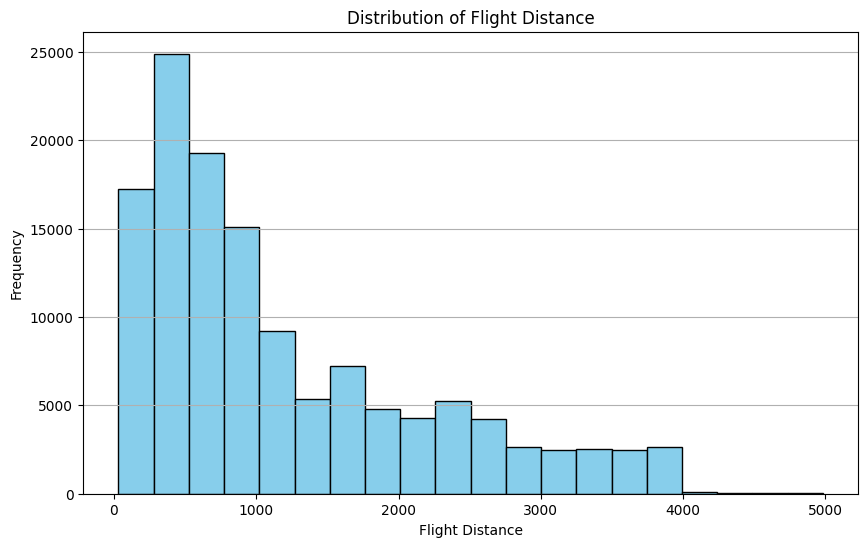

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['FLIGHT_DISTANCE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

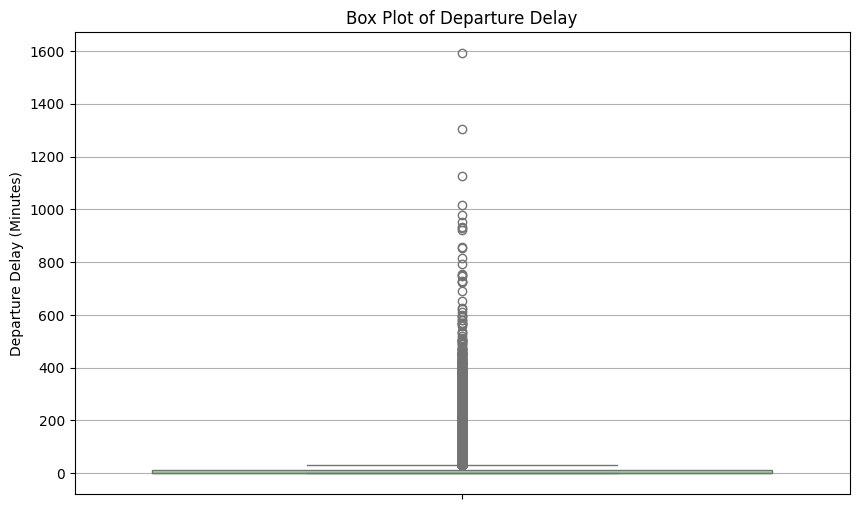

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['DEPARTURE_DELAY_IN_MINUTES'], color='lightgreen')
plt.title('Box Plot of Departure Delay')
plt.ylabel('Departure Delay (Minutes)')
plt.grid(axis='y')
plt.show()

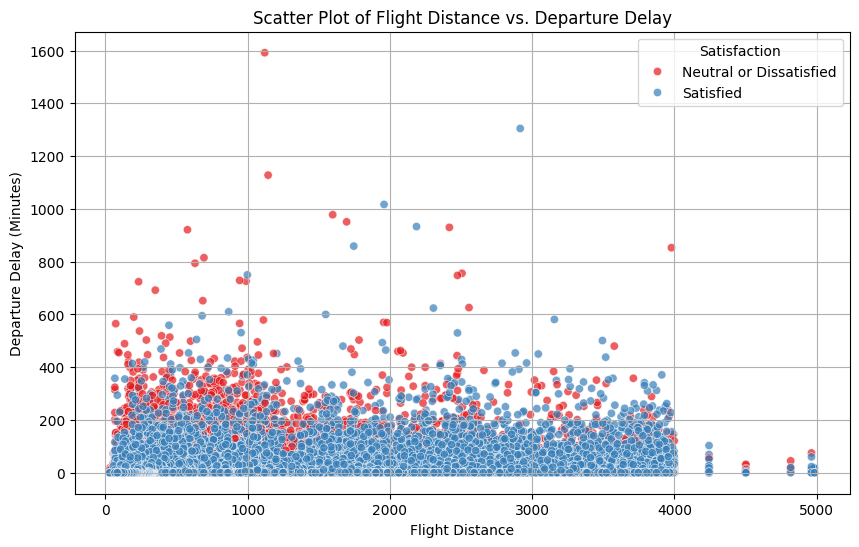

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FLIGHT_DISTANCE', y='DEPARTURE_DELAY_IN_MINUTES', hue='SATISFACTION', 
                data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Flight Distance vs. Departure Delay')
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay (Minutes)')
plt.legend(title='Satisfaction')
plt.grid()
plt.show()

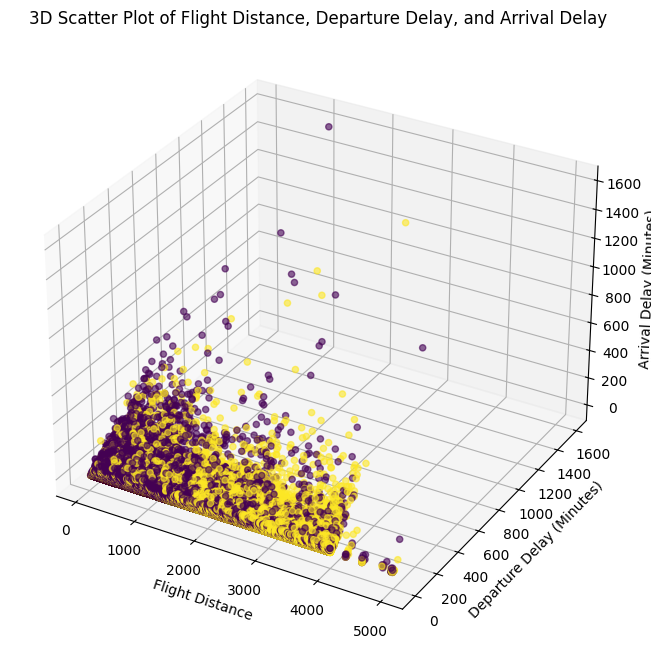

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['FLIGHT_DISTANCE'], df['DEPARTURE_DELAY_IN_MINUTES'], df['ARRIVAL_DELAY_IN_MINUTES'],
           c=df['SATISFACTION'].astype('category').cat.codes, cmap='viridis', alpha=0.6)
ax.set_xlabel('Flight Distance')
ax.set_ylabel('Departure Delay (Minutes)')
ax.set_zlabel('Arrival Delay (Minutes)')
ax.set_title('3D Scatter Plot of Flight Distance, Departure Delay, and Arrival Delay')
plt.show()

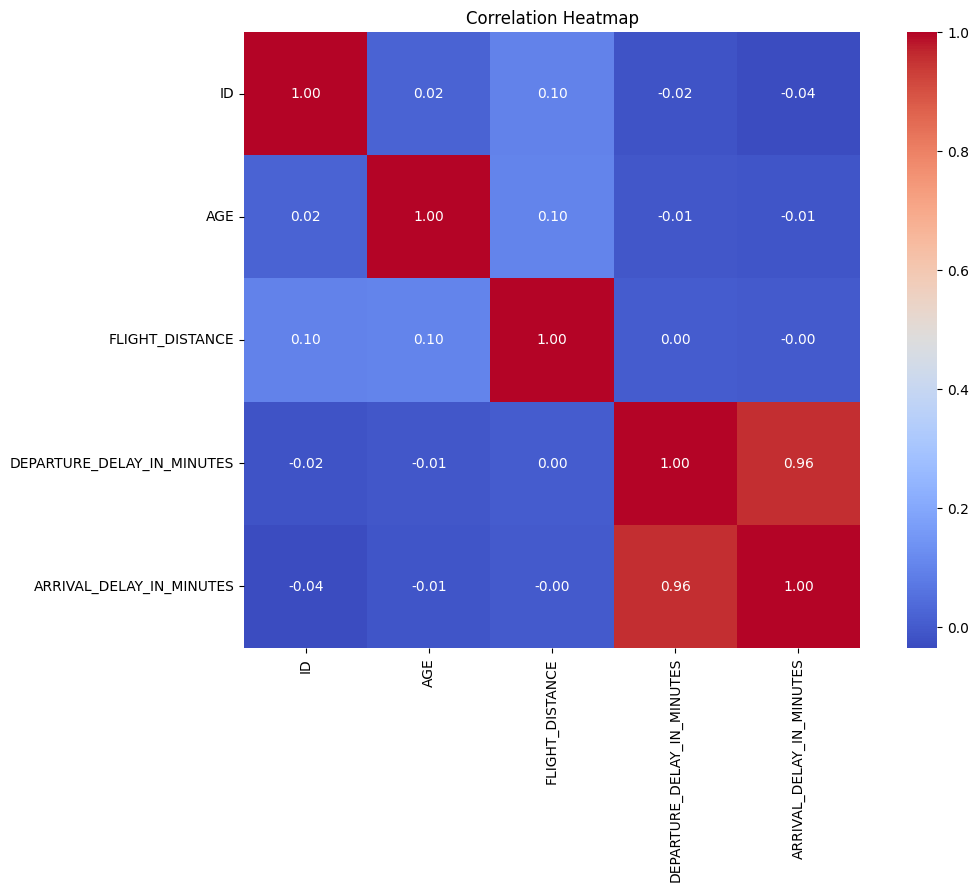

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

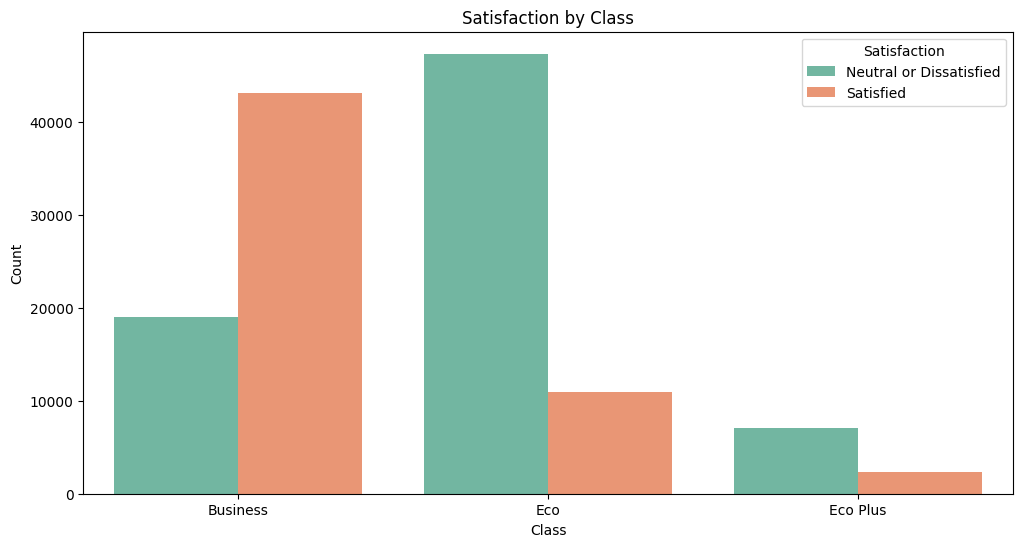

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CLASS', hue='SATISFACTION', data=df, palette='Set2')
plt.title('Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

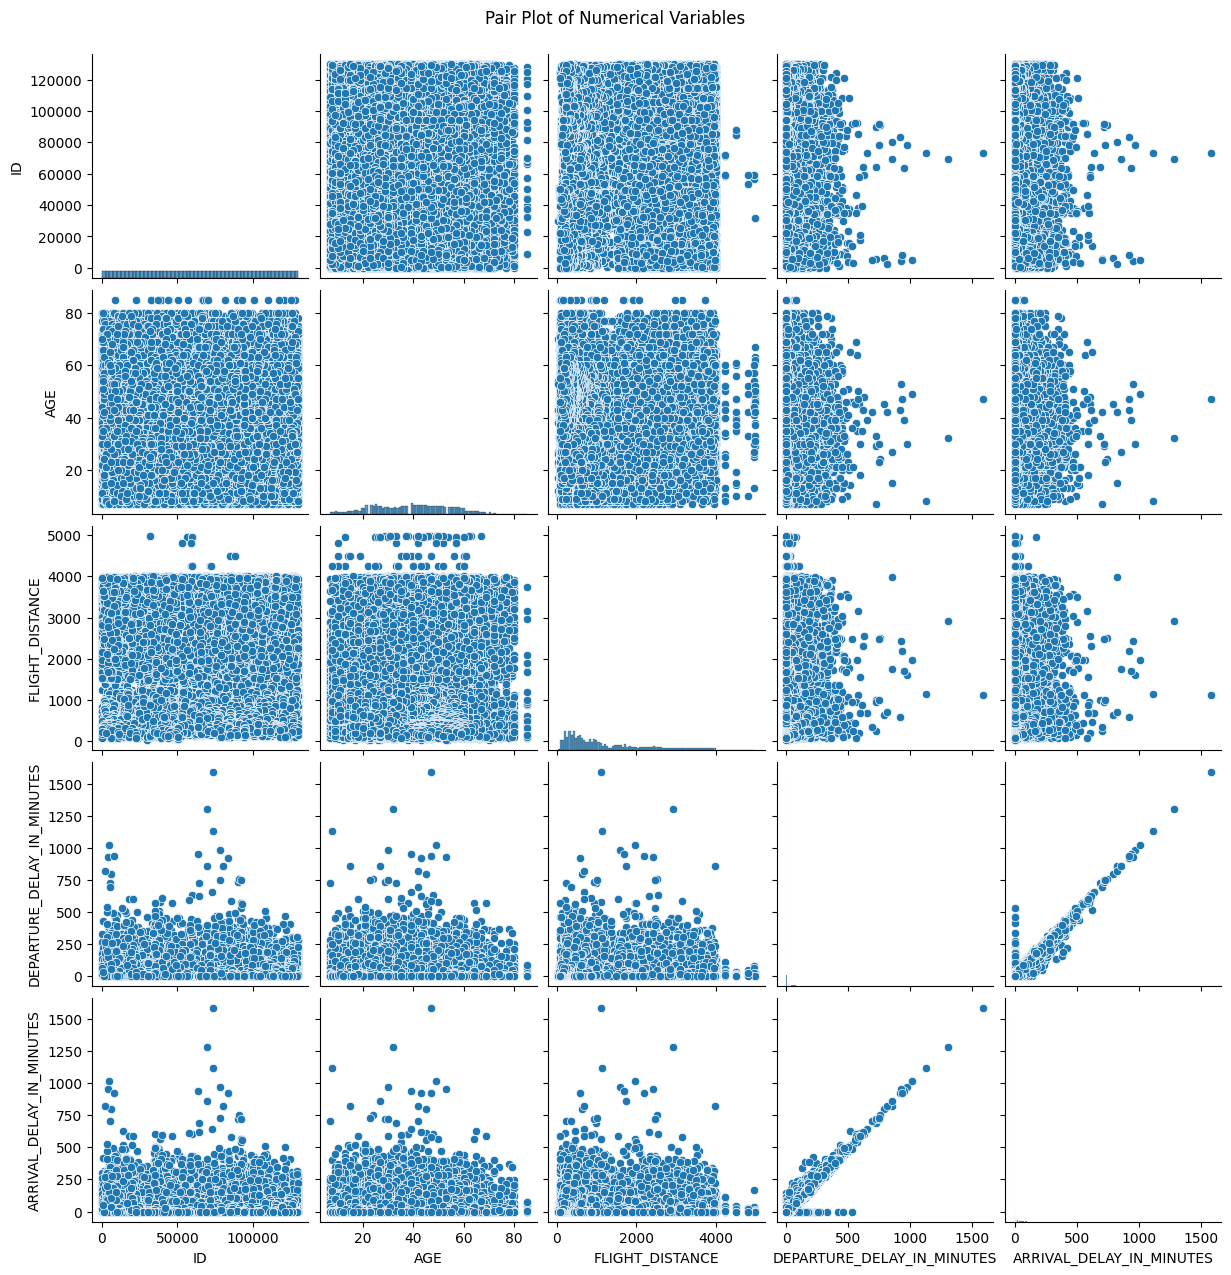

In [16]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

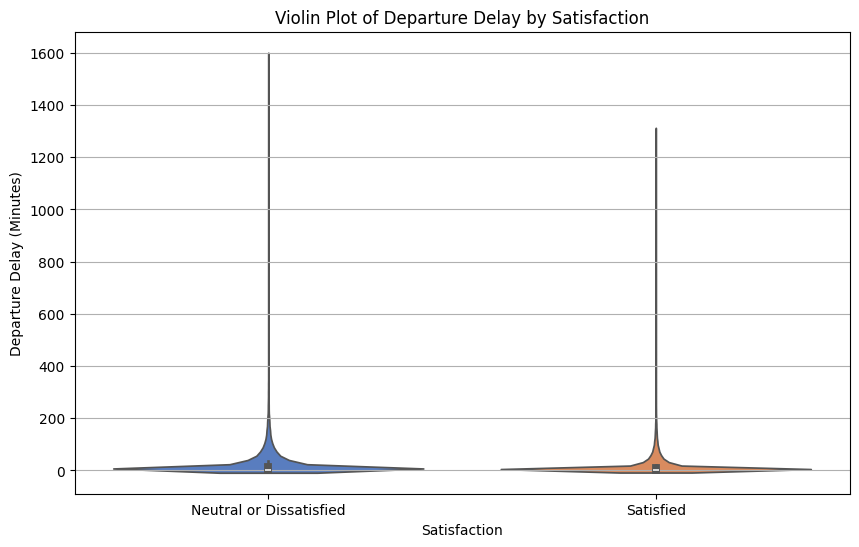

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='SATISFACTION', y='DEPARTURE_DELAY_IN_MINUTES', data=df, palette='muted')
plt.title('Violin Plot of Departure Delay by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Departure Delay (Minutes)')
plt.grid(axis='y')
plt.show()

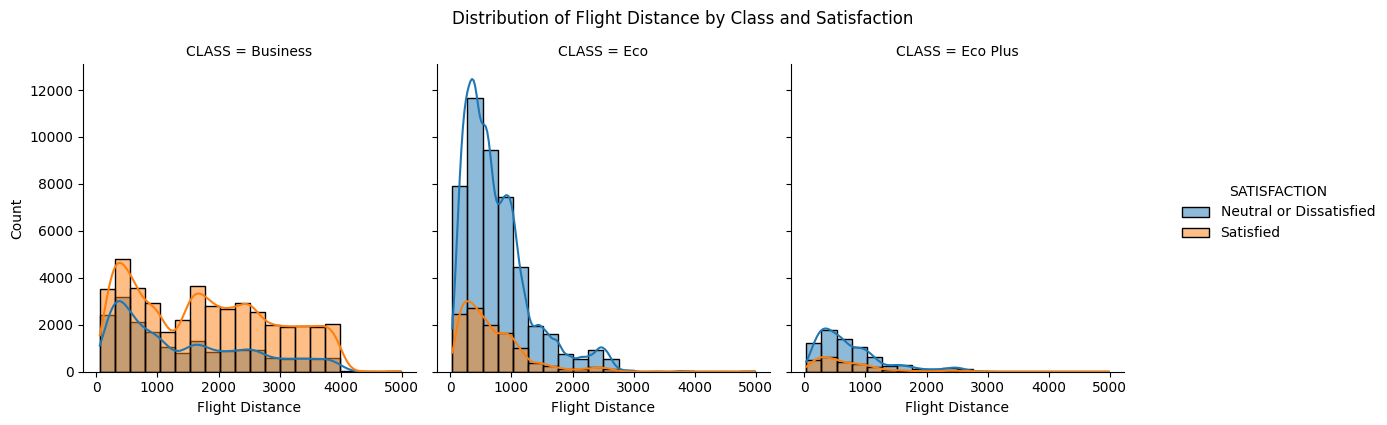

In [18]:
g = sns.FacetGrid(df, col='CLASS', hue='SATISFACTION', margin_titles=True, height=4)
g.map(sns.histplot, 'FLIGHT_DISTANCE', bins=20, kde=True)
g.add_legend()
g.set_axis_labels('Flight Distance', 'Count')
g.fig.suptitle('Distribution of Flight Distance by Class and Satisfaction', y=1.05)
plt.show()

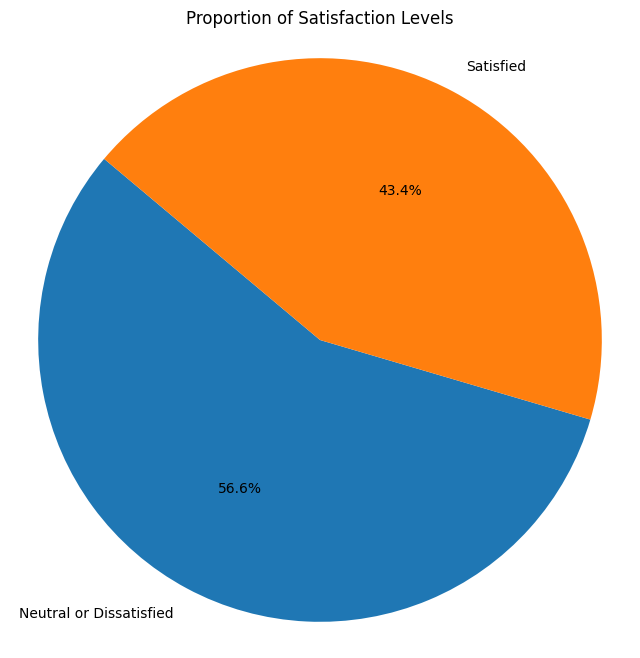

In [19]:
satisfaction_counts = df['SATISFACTION'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Satisfaction Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

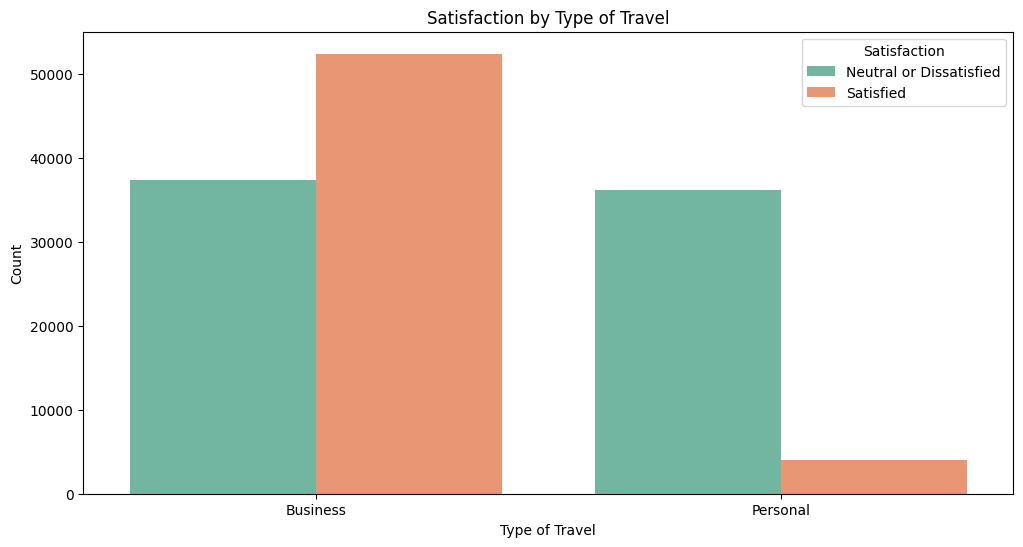

In [20]:
# Count plot of satisfaction by type of travel
plt.figure(figsize=(12, 6))
sns.countplot(x='TYPE_OF_TRAVEL', hue='SATISFACTION', data=df, palette='Set2')
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

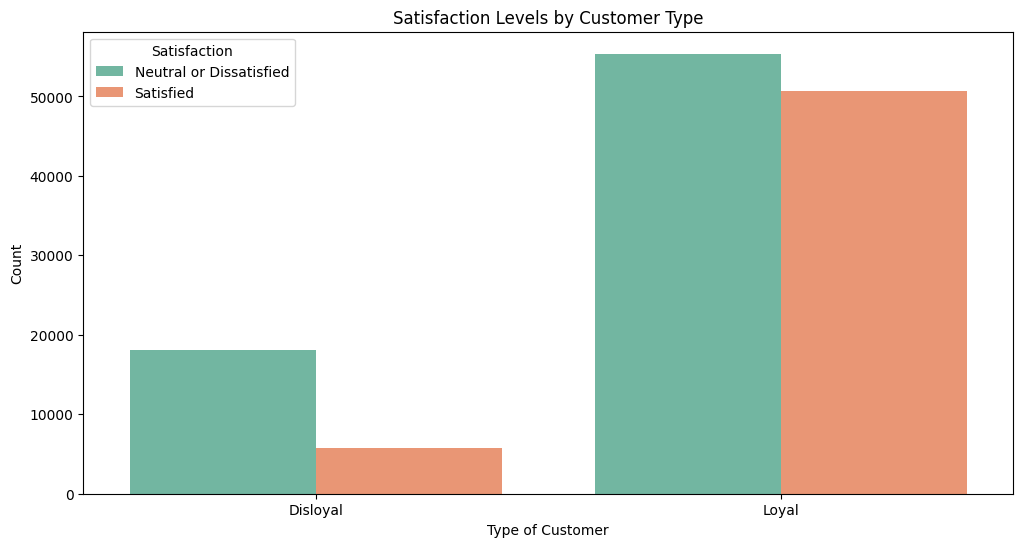

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CUSTOMER_TYPE', hue='SATISFACTION', data=df, palette='Set2')
plt.title('Satisfaction Levels by Customer Type')
plt.xlabel('Type of Customer')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

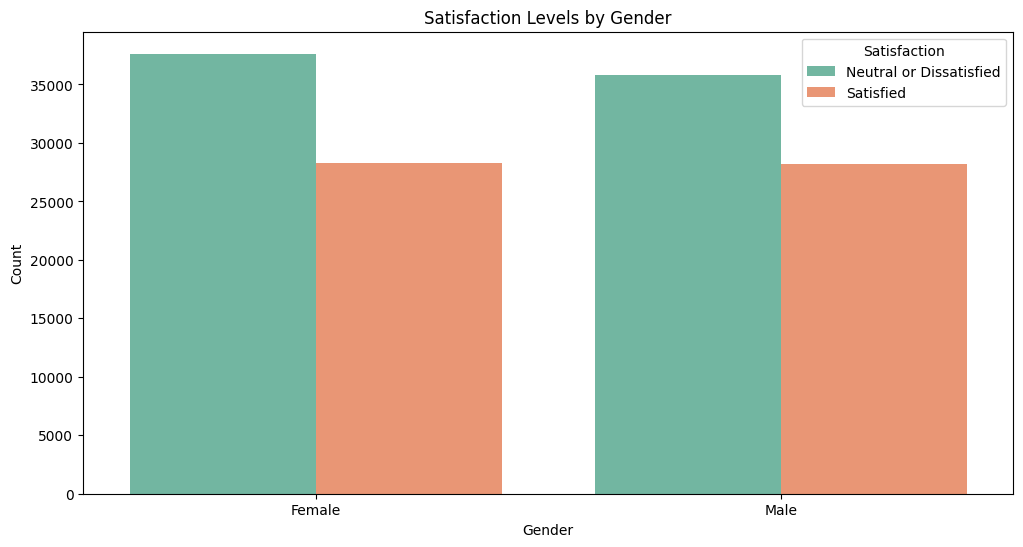

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='GENDER', hue='SATISFACTION', data=df, palette='Set2')
plt.title('Satisfaction Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

In [23]:
#Interaction between AGE and FLIGHT_DISTANCE
df['AGE_FLIGHT_DISTANCE'] = df['AGE'] * df['FLIGHT_DISTANCE']

In [24]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER', 'CUSTOMER_TYPE', 'TYPE_OF_TRAVEL', 'CLASS', 
                                          'INFLIGHT_WIFI_SERVICE', 'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 
                                          'EASE_OF_ONLINE_BOOKING', 'GATE_LOCATION', 
                                          'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT', 
                                          'INFLIGHT_ENTERTAINMENT', 'ON-BOARD_SERVICE', 
                                          'LEG_ROOM_SERVICE', 'CHECKIN_SERVICE', 
                                          'INFLIGHT_SERVICE', 'CLEANLINESS', 
                                          'SATISFACTION'], 
                                          drop_first=True)  # Drop first to avoid multicollinearity


In [25]:
from sklearn.preprocessing import LabelEncoder

# Example of label encoding for SATISFACTION
label_encoder = LabelEncoder()
df_encoded['SATISFACTION_BINARY'] = label_encoder.fit_transform(df['SATISFACTION'])

In [26]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['AGE', 'FLIGHT_DISTANCE', 'DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [27]:
# Features and target variable
X = df_encoded.drop('SATISFACTION_BINARY', axis=1)  # All features except the target
y = df_encoded['SATISFACTION_BINARY']  # Target variable

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardizing numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encoding categorical features
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [30]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print(f"Results for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


In [36]:

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear')  # Increased max_iter and added verbose
}

In [37]:
for name, model in models.items():
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     14648
           1       0.70      0.60      0.64     11328

    accuracy                           0.71     25976
   macro avg       0.71      0.70      0.70     25976
weighted avg       0.71      0.71      0.71     25976

Confusion Matrix:
 [[11767  2881]
 [ 4582  6746]]


Results for XGBClassifier:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     14648
           1       0.74      0.61      0.67     11328

    accuracy                           0.74     25976
   macro avg       0.74      0.72      0.73     25976
weighted avg       0.74      0.74      0.73     25976

Confusion Matrix:
 [[12200  2448]
 [ 4398  6930]]


Results for SVC:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75     14648
           1       0.69      0.52      0.60     11328

XGBoost Best

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost only
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

def tune_xgb_model(model, param_grid, X_train, y_train):
    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model.__class__.__name__}: {grid_search.best_score_:.4f}")
    
    return grid_search

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Tune the XGBoost model
print("Tuning XGBoost...")
best_xgb_model = tune_xgb_model(xgb_model, param_grid_xgb, X_train, y_train)


Tuning XGBoost...
Best parameters for XGBClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best cross-validation score for XGBClassifier: 0.7326


In [41]:
import pickle
import joblib
import os

# Create the models directory if it doesn't exist
models_dir = '../models'  # Adjust this path as needed
os.makedirs(models_dir, exist_ok=True)

# Save the best XGBoost model using pickle
with open(os.path.join(models_dir, 'best_xgb_model_pickle.pkl'), 'wb') as file:
    pickle.dump(best_xgb_model, file)

print("Model saved as 'best_xgb_model_pickle.pkl' in models folder")

# Save the best XGBoost model using joblib
joblib.dump(best_xgb_model, os.path.join(models_dir, 'best_xgb_model_joblib.pkl'))

print("Model saved as 'best_xgb_model_joblib.pkl' in models folder")

Model saved as 'best_xgb_model_pickle.pkl' in models folder
Model saved as 'best_xgb_model_joblib.pkl' in models folder


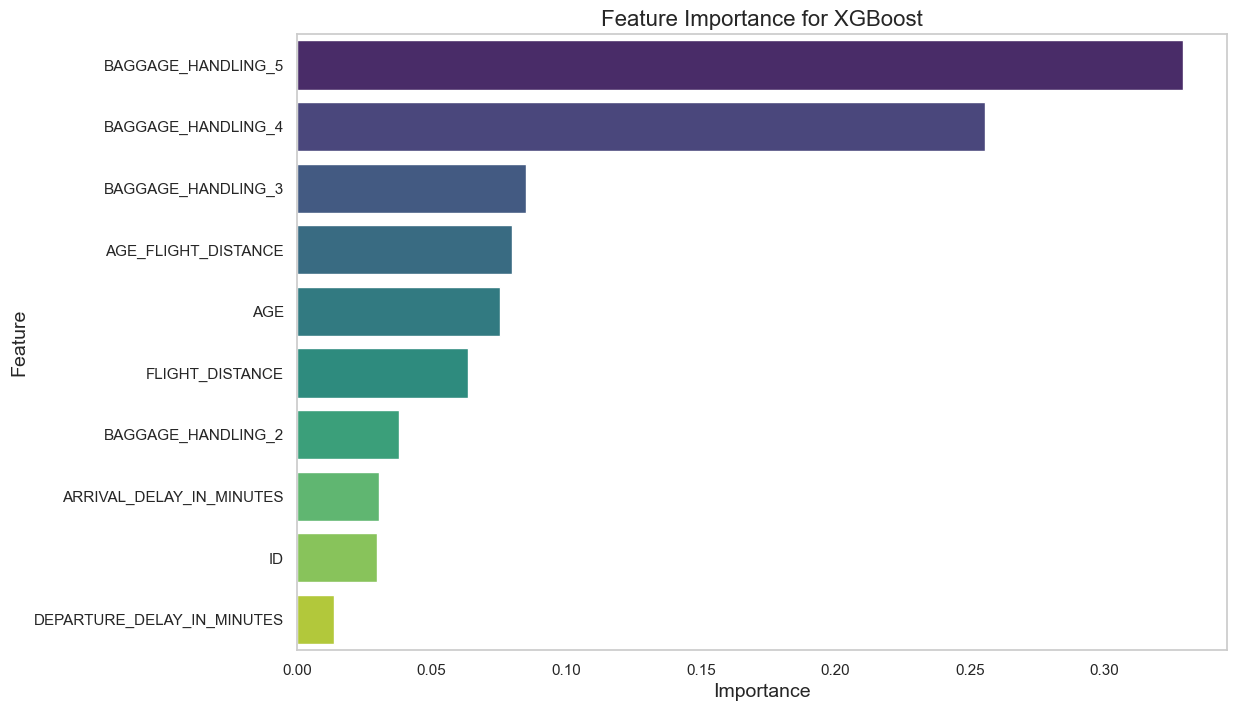

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For better aesthetics

def plot_feature_importance_rf_xgb(models, X_train):
    for model_name, model in models.items():
        # Create and fit the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline.fit(X_train, y_train)

        if model_name == "XGBoost":
            importances = pipeline.named_steps['classifier'].feature_importances_

        # Combine importances with feature names
        feature_names = (
            pipeline.named_steps['preprocessor'].transformers_[0][1]
            .named_steps['scaler']
            .get_feature_names_out(numerical_cols).tolist() +
            pipeline.named_steps['preprocessor'].transformers_[1][1]
            .named_steps['onehot']
            .get_feature_names_out(categorical_cols).tolist()
        )

        # Create a DataFrame for visualization
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Set the style of seaborn
        sns.set(style="whitegrid")

        # Plot feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10], palette='viridis')
        plt.xlabel('Importance', fontsize=14)
        plt.ylabel('Feature', fontsize=14)
        plt.title(f'Feature Importance for {model_name}', fontsize=16)
        plt.grid(axis='x')
        plt.show()

# Define the models you want to evaluate
selected_models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Call the function to plot feature importance
plot_feature_importance_rf_xgb(selected_models, X_train)
